In [3]:
from dotenv import load_dotenv
from pathlib import Path
import yfinance as yf
import pandas as pd
import numpy as np
import plotly 
import plotly.express as px
from matplotlib import pyplot as plt
import hvplot.pandas

# import panel as pn

# from pathlib import Path
# import holoviews as hv
# import seaborn as sns
# from pandas_datareader import data
# from MCForecastTools import MCSimulation
# import alpaca_trade_api as tradeapi
%matplotlib inline


In [4]:
# ticker_list = ['AGG','VTI', 'VOO', 'QQQ', 'XLE', 'IWM', 'IYY', 'XLF', 'UUP', 'DJT', 'GSG']
ticker_list = ['FB']

In [5]:
df_price = yf.download(ticker_list,period='5y')
df_price 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-09,137.720001,138.570007,137.399994,138.240005,138.240005,15535300
2017-03-10,138.910004,139.490005,138.220001,138.789993,138.789993,16314100
2017-03-13,138.710007,139.679993,138.669998,139.600006,139.600006,10955500
2017-03-14,139.460007,139.460007,138.520004,139.320007,139.320007,12944000
2017-03-15,139.289993,140.100006,138.490005,139.720001,139.720001,19344800
...,...,...,...,...,...,...
2022-03-02,204.779999,209.149994,202.020004,208.110001,208.110001,29452100
2022-03-03,209.020004,209.080002,201.419998,202.970001,202.970001,27263500
2022-03-04,202.369995,205.889999,198.789993,200.059998,200.059998,32130900


In [11]:
# Slice to just the `close` column
signals_df = df_price.loc[:,["Close"]]

In [25]:
# Set the short window and long windows
short_window = 21
medium_window = 50
long_window = 200

In [43]:
# Generate the short and long moving averages (50 and 100 days, respectively)
signals_df['EMA21'] = signals_df['Close'].ewm(span=short_window).mean()
signals_df['EMA50'] = signals_df['Close'].ewm(span=medium_window).mean()
signals_df['EMA200'] = signals_df['Close'].ewm(span=long_window).mean()


# Prepopulate the `Signal` for trading
signals_df['Signal'] = 0.0

In [44]:
signals_df

,Close,EMA21,EMA50,EMA200,Signal
Date,,,,,
2017-03-09,138.240005,138.240005,138.240005,138.240005,0.0
2017-03-10,138.789993,138.528094,138.520499,138.516374,0.0
2017-03-13,139.600006,138.919941,138.894822,138.881203,0.0
2017-03-14,139.320007,139.034677,139.007580,138.992555,0.0
2017-03-15,139.720001,139.199029,139.161686,139.140969,0.0
...,...,...,...,...,...
2022-03-02,208.110001,229.051179,265.893711,306.704406,0.0
2022-03-03,202.970001,226.680163,263.426114,305.672219,0.0
2022-03-04,200.059998,224.260148,260.941169,304.621348,0.0


Text(0, 0.5, 'Price in $')

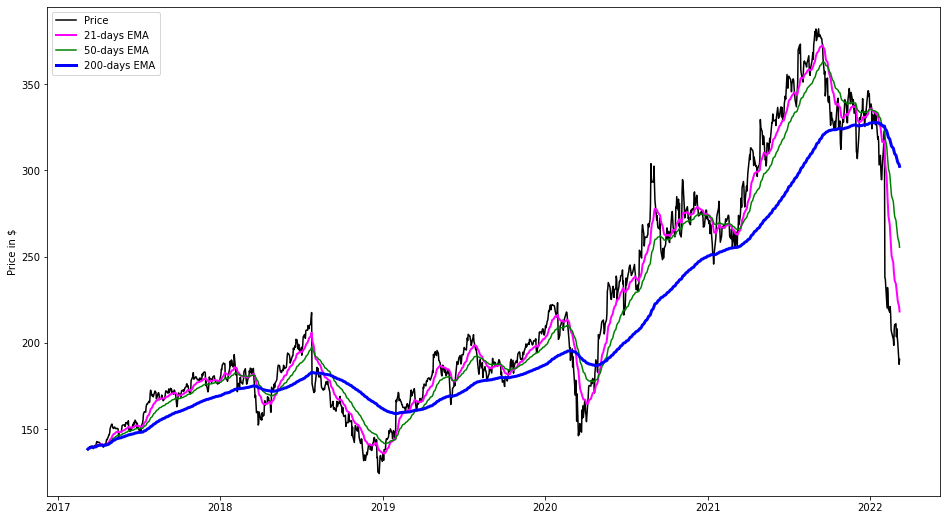

In [48]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(signals_df['Close'], label='Price', color='black',linewidth=1.5)
ax.plot(signals_df['EMA21'], label = '21-days EMA', color='magenta',linewidth=2)
ax.plot(signals_df['EMA50'], label = '50-days EMA', color='green')
ax.plot(signals_df['EMA200'], label = '200-days EMA',color='blue',linewidth=3)


ax.legend(loc='best')
ax.set_ylabel('Price in $')
# ax.xaxis.set_major_formatter(my_year_month_fmt)

In [49]:
signals_df['%_away_21'] = ((signals_df['Close']- signals_df['EMA21'])/((signals_df['Close']+signals_df['EMA21'])/2))*100
signals_df['%_away_50'] = ((signals_df['Close']- signals_df['EMA50'])/((signals_df['Close']+signals_df['EMA50'])/2))*100
signals_df['%_away_200'] = ((signals_df['Close']- signals_df['EMA200'])/((signals_df['Close']+signals_df['EMA200'])/2))*100
signals_df

,Close,EMA21,EMA50,EMA200,Signal,%_away_21,%_away_50,%_away_200
Date,,,,,,,,
2017-03-09,138.240005,138.240005,138.240005,138.240005,0.0,0.000000,0.000000,0.000000
2017-03-10,138.789993,138.528094,138.520499,138.516374,0.0,0.188880,0.194363,0.197341
2017-03-13,139.600006,138.919941,138.894822,138.881203,0.0,0.488342,0.506425,0.516231
2017-03-14,139.320007,139.034677,139.007580,138.992555,0.0,0.205012,0.224504,0.235313
2017-03-15,139.720001,139.199029,139.161686,139.140969,0.0,0.373566,0.400396,0.415284
...,...,...,...,...,...,...,...,...
2022-03-02,208.110001,229.051179,265.893711,306.704406,0.0,-9.580530,-24.381121,-38.302893
2022-03-03,202.970001,226.680163,263.426114,305.672219,0.0,-11.036962,-25.924793,-40.382892
2022-03-04,200.059998,224.260148,260.941169,304.621348,0.0,-11.406553,-26.412589,-41.436582


In [52]:
signals_df['%_away_21'] = ((signals_df['Close']- signals_df['EMA21'])/((signals_df['Close']+signals_df['EMA21'])/2))*100
signals_df['%_away_50'] = ((signals_df['Close']- signals_df['EMA50'])/((signals_df['Close']+signals_df['EMA50'])/2))*100
signals_df['%_away_200'] = ((signals_df['Close']- signals_df['EMA200'])/((signals_df['Close']+signals_df['EMA200'])/2))*100
signals_df


In [ ]:
import statistics


In [53]:
# std_21 = statistics.stdev(signals_df['%_away_21'])
# print(f'The standard deviation of the 21EMA is {std_21}')
# std_50 = statistics.stdev(signals_df['%_away_50'])
# print(f'The standard deviation of the 50EMA is {std_50}')
# std_200 = statistics.stdev(signals_df['%_away_200'])
# print(f'The standard deviation of the 200EMA is {std_200}')

The standard deviation of the 21EMA is 4.782949743875957
The standard deviation of the 50EMA is 7.3111525460435995
The standard deviation of the 200EMA is 11.173316791318143


In [55]:
# Generate the trading signals 1 (entry) 
# We want to buy the dips!

for index, row in signals_df.iterrows():
    if row["%_away_21"] >  2*std_21:
        if row["%_away_50"] >  2*std_50:
            if row["%_away_200"] >  2*std_200:
                signals_df.loc[index, "Signal"] = 1.0
        


In [56]:
# signals_df.loc[Signal='1'

In [57]:
# Visualize entry position relative to close price
entry = signals_df[signals_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = signals_df[signals_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize close price for the investment
signals_df_close = signals_df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)
    
# Overlay plots
ema_signal_plot = entry * exit * signals_df_close
ema_signal_plot

:Overlay
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)
   .Curve.I          :Curve   [Date]   (Close)